<a href="https://colab.research.google.com/github/Francofus/IMSE_541/blob/main/A6_CHAPTER13_FrancoFus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [44]:
data = pd.read_csv('/content/drive/MyDrive/IMSE 541/Table 13E.6.csv', sep=',', na_values=".")
data



,A,B,C,D,Treatment_Combination,Results
0,-1,-1,-1,-1,1,7.037
1,1,-1,-1,-1,a,14.707
2,-1,1,-1,-1,b,11.635
3,1,1,-1,-1,ab,17.273
4,-1,-1,1,-1,c,10.403
5,1,-1,1,-1,ac,4.368
6,-1,1,1,-1,bc,9.360
7,1,1,1,-1,abc,13.440
8,-1,-1,-1,1,d,8.561
9,1,-1,-1,1,ad,16.867


In [45]:
#creat a 3D surface plot for data visualization
#response on z axis is the raw data SF
z = data.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)
#print(x1)
#print(x2)
#print(z)
z2=data[['A','B', 'C', 'D', 'Results']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='x1',
                    yaxis_title='x2',
                    zaxis_title='Results'),
                   )
fig.show()

In [46]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   A                      32 non-null     int64  
 1   B                      32 non-null     int64  
 2   C                      32 non-null     int64  
 3   D                      32 non-null     int64  
 4   Treatment_Combination  31 non-null     object 
 5   Results                32 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.6+ KB


In [47]:
X=df[['A', 'B', 'C','D']]
X

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [48]:
xx = X.to_numpy()
poly = PolynomialFeatures(degree=3, interaction_only=True)
xx_poly = poly.fit_transform(xx)
feature_names = poly.get_feature_names_out(X.columns)
xxpd = pd.DataFrame(xx_poly, columns=feature_names)

print(xxpd)


      1    A    B    C    D  A B  A C  A D  B C  B D  C D  A B C  A B D  \
0   1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0  1.0  1.0   -1.0   -1.0   
1   1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0    1.0    1.0   
2   1.0 -1.0  1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0    1.0    1.0   
3   1.0  1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0   -1.0   -1.0   
4   1.0 -1.0 -1.0  1.0 -1.0  1.0 -1.0  1.0 -1.0  1.0 -1.0    1.0   -1.0   
5   1.0  1.0 -1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0  1.0 -1.0   -1.0    1.0   
6   1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0 -1.0   -1.0    1.0   
7   1.0  1.0  1.0  1.0 -1.0  1.0  1.0 -1.0  1.0 -1.0 -1.0    1.0   -1.0   
8   1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0 -1.0  1.0 -1.0 -1.0   -1.0    1.0   
9   1.0  1.0 -1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0 -1.0    1.0   -1.0   
10  1.0 -1.0  1.0 -1.0  1.0 -1.0  1.0 -1.0 -1.0  1.0 -1.0    1.0   -1.0   
11  1.0  1.0  1.0 -1.0  1.0  1.0 -1.0  1.0 -1.0  1.0 -1.0   -1.0    1.0   
12  1.0 -1.0 -1.0  1.0  1

In [49]:
X = xxpd[['A', 'B', 'C','D', 'A B', 'A C', 'A D', 'B C', 'B D', 'C D', 'A B C', 'A B D', 'A C D', 'B C D']]
X

,A,B,C,D,A B,A C,A D,B C,B D,C D,A B C,A B D,A C D,B C D
0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
5,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
6,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
9,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [50]:
Y=df[['Results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 6.6994375],
       [14.9700625],
       [11.8690625],
       [17.5369375],
       [10.2840625],
       [ 4.2259375],
       [ 9.2994375],
       [13.1885625],
       [ 8.7630625],
       [16.9524375],
       [13.7599375],
       [19.7385625],
       [12.0844375],
       [ 6.0215625],
       [11.0695625],
       [15.3459375],
       [ 6.6994375],
       [14.9700625],
       [11.8690625],
       [17.5369375],
       [10.2840625],
       [ 4.2259375],
       [ 9.2994375],
       [13.1885625],
       [ 8.7630625],
       [16.9524375],
       [13.7599375],
       [19.7385625],
       [12.0844375],
       [ 6.0215625],
       [11.0695625],
       [15.3459375]])

In [51]:
X = sm.add_constant(X)
X

,const,A,B,C,D,A B,A C,A D,B C,B D,C D,A B C,A B D,A C D,B C D
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [52]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     533.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.30e-19
Time:                        05:30:22   Log-Likelihood:                 5.8461
No. Observations:                  32   AIC:                             18.31
Df Residuals:                      17   BIC:                             40.29
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9881      0.049    245.218      0.0

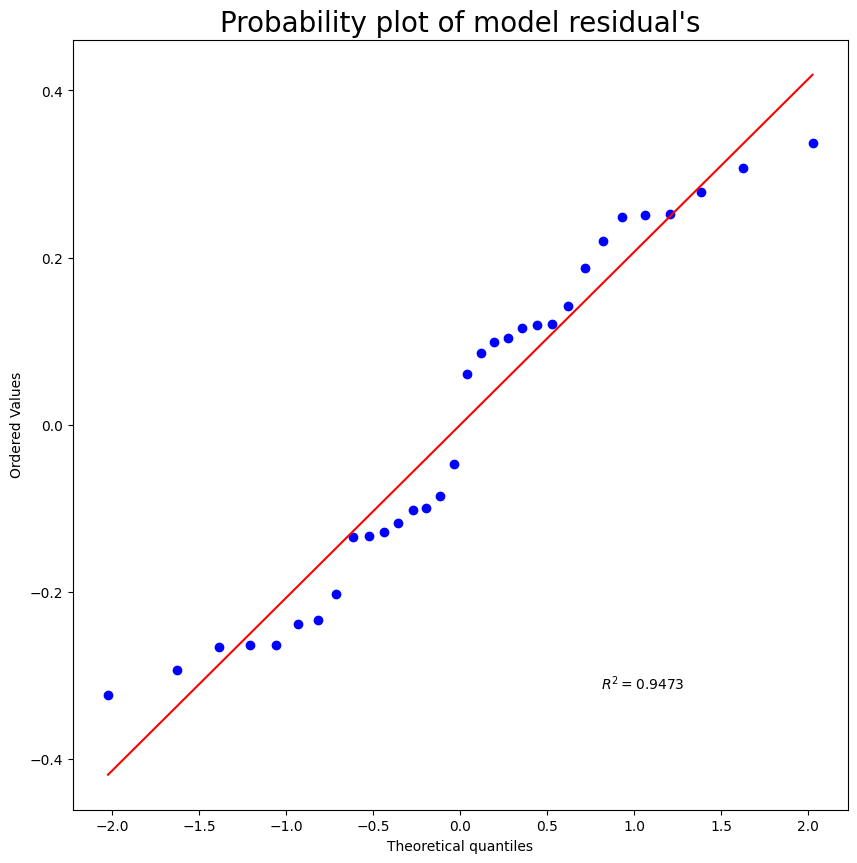

In [60]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [61]:
stats.levene(df['Results'][df['A'] == -1],
             df['Results'][df['A'] == 1])

LeveneResult(statistic=4.663302958097873, pvalue=0.03893355101989784)

Since p value is very large, we reject that factor A has equal variance

In [62]:
stats.levene(df['Results'][df['B'] == -1],
             df['Results'][df['B'] == 1])

LeveneResult(statistic=1.5728405976484332, pvalue=0.2194793731093549)

Since p value is very large, we fail to reject that factor B has equal variance

In [63]:
stats.levene(df['Results'][df['C'] == -1],
             df['Results'][df['C'] == 1])

LeveneResult(statistic=0.9174820409238761, pvalue=0.34579313267859624)

Since p value is very large, we fail to reject that factor C has equal variance

In [64]:
stats.levene(df['Results'][df['D'] == -1],
             df['Results'][df['D'] == 1])

LeveneResult(statistic=0.016814388523183236, pvalue=0.8976928041946247)

Since p value is very large, we fail to reject that factor D has equal variance

In [72]:
X = xxpd[['A', 'B','D', 'A B', 'A D', 'B D', 'A B D']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2.857
Date:                Wed, 25 Oct 2023   Prob (F-statistic):             0.0256
Time:                        07:14:28   Log-Likelihood:                -81.850
No. Observations:                  32   AIC:                             179.7
Df Residuals:                      24   BIC:                             191.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9881      0.638     18.804      0.0

In [73]:
Y=df[['Results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 8.49175],
       [ 9.598  ],
       [10.58425],
       [15.36275],
       [ 8.49175],
       [ 9.598  ],
       [10.58425],
       [15.36275],
       [10.42375],
       [11.487  ],
       [12.41475],
       [17.54225],
       [10.42375],
       [11.487  ],
       [12.41475],
       [17.54225],
       [ 8.49175],
       [ 9.598  ],
       [10.58425],
       [15.36275],
       [ 8.49175],
       [ 9.598  ],
       [10.58425],
       [15.36275],
       [10.42375],
       [11.487  ],
       [12.41475],
       [17.54225],
       [10.42375],
       [11.487  ],
       [12.41475],
       [17.54225]])

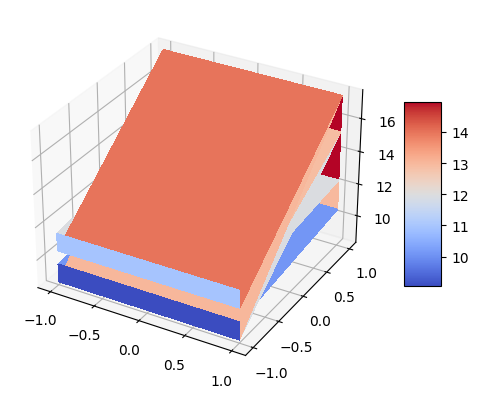

In [76]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2  = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

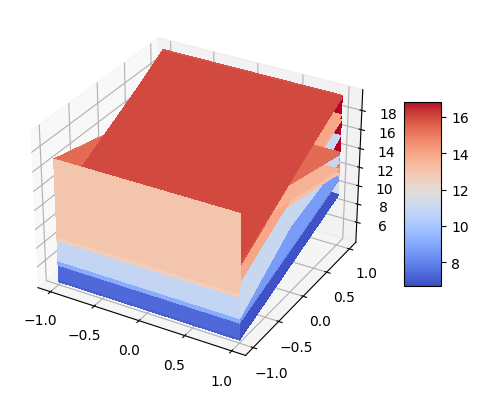

In [77]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()